## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [70]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [71]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'
arrange_data = list()

splitdata = data.split(split_tag)
print(len(splitdata))
for i in splitdata:
    try:
        arrange_data.append(i.split('\t')[1])
    except:
        pass
print(arrange_data[0])

9996
http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


## 將 txt 轉成 pandas dataframe

In [73]:
import pandas as pd

    
df = pd.DataFrame(arrange_data)
df.head()

,0
0,http://farm1.static.flickr.com/145/430300483_2...
1,http://farm2.static.flickr.com/1005/3352960681...
2,http://farm1.static.flickr.com/27/51009336_a96...
3,http://farm4.static.flickr.com/3025/2444687979...
4,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


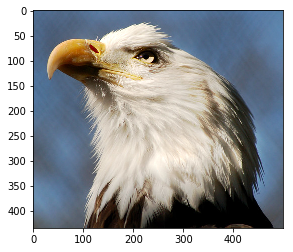

In [74]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0][0]
print(first_link)

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [108]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = list()
    for url in url_list:
        if requests.get(url).status_code  == 200:
            img_list.append(url)
            print(url, ' is already append')
        else:
            print(url, ' is error')
    
    return img_list

In [116]:
result = img2arr_fromURLs(df[0:5][0].tolist())
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(img)
    plt.show()

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg  is already append
http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg  is already append
http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg  is already append
http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg  is already append
http://img100.imageshack.us/img100/3253/forrest004fs9.jpg  is error
Total images that we got: 4 


TypeError: Image data can not convert to float